# Decision Tree
##### Decision tree adalah algoritma machine learning. Algoritma ini untuk menjawab pertanyaan berdasarkan tree yang sudah dibangun.

Sederhanya ketika kita ingin pergi keluar rumah kita akan mempertimbangkan hal.

1. Apakah sudah ada tempat tujuan? Jika ya maka dilanjutkan dengan pertanyaan selanjutnya, jika tidak maka tidak jadi keluar.
2. Apakah lamaran cuaca hari ini adalah baik? Jika ya maka dilanjutkan dengan pertanyaan selanjutnya, jika tidak maka tidak jadi keluar.
3. Apakah langit sedang gelap hari ini? Jika ya maka dilanjutkan dengan pertanyaan selanjutnya, jika tidak maka tidak jadi keluar.
4. Apakah ada alat transportasi untuk berpergian? Jika ya maka dilanjutkan dengan pertanyaan selanjutnya, jika tidak maka tidak jadi keluar.
Dari paparan tersebut dapat dilihat adanya kondisi seperti if else. Kondisi ini kemudian akan dirancang dalam bentuk pohon (decision tree). Sehingga ketika kita memiliki data "hari ini gelap, saya tidak ada kendaraan, saya ingin ke mall" maka akan muncul ouput berupa kelayakan keluar rumah pada hari ini.

Walau demikian, permasalahan terjadi ketika adanya beberapa data yang menjadi dasar pertimbangan dalam memunculkan solusi.

Decision Tree diintegrasikan menggunakan python dalam library sklearn. Adapun langkah-langkah tahapan decision tree adalah sebagai berikut!

# Contoh kasus Decision Tree dengan data excel "penjualan"

#### Kasus ini melakukan prediksi jumlah produk terjual, pada penjualan yang dilakukan berdasarkan (toko, jenisproduk, hargapcs, banyaktitip, lamapenjualan)

In [1]:
import pandas as pd
# membuka file dengan pandas
try:
    df1 = pd.read_csv("penjualan.csv", sep=";")
    print("File berhasil dibaca")
except FileNotFoundError:
    print("File tidak berhasil dibaca")

# karna dalam file tersebut, hasil toko yang diberikan berupa toko along, toko jutoli, intirasa, dan sebagainya, maka dalam proses ini kita perlu melakukan encoding dengan tujuan mengubah menjadi angka agar dapat diproses oleh sistem. Lakukan hal yang serupa juga untuk jenisproduk dan hargapcs!
encoding = {"toko": {"along":0, "jutoli":1, "intirasa":2, "segarmanis":3},
            "jenisproduk": {"toples":0, "garing":1, "original":2, "biasa":3},
            "hargapcs": {40000:0, 20000:1}
           }

df1.replace(encoding, inplace=True)

# Mengonversi kolom tanggalambil dan tanggaltitip ke format datetime
df1['tanggalambil'] = pd.to_datetime(df1['tanggalambil'], dayfirst=True)
df1['tanggaltitip'] = pd.to_datetime(df1['tanggaltitip'], dayfirst=True)
# Menghitung selisih antara tanggalambil dan tanggaltitip
df1['lamapenjualan'] = (df1['tanggalambil'] - df1['tanggaltitip']).dt.days

# memunculkan 40 baris teratas
df1.head(41)

File berhasil dibaca


No.  toko  jenisproduk  hargapcs tanggaltitip tanggalambil  banyaktitip  \
0     1     0            0         0   2024-01-01   2024-01-07            6   
1     2     1            1         0   2024-01-01   2024-01-06            6   
2     3     2            2         1   2024-01-01   2024-01-07           18   
3     4     3            3         1   2024-01-01   2024-01-09           10   
4     5     0            3         1   2024-01-06   2024-01-11           10   
5     6     2            0         0   2024-01-06   2024-01-09            5   
6     7     0            1         0   2024-01-09   2024-01-13            8   
7     8     3            0         0   2024-01-09   2024-01-14           10   
8     9     2            0         0   2024-01-09   2024-01-14            9   
9    10     0            3         1   2024-01-09   2024-01-17           10   
10   11     1            0         0   2024-01-20   2024-01-24            9   
11   12     2            0         0   2024-01-20   2024-01-26           10   
12   13     3            3         1   2024-01-20   2024-01-27           10   
13   14     0            0         0   2024-01-20   2024-01-26            7   
14   15     3            0         0   2024-02-02   2024-02-08            5   
15   16     0            2         1   2024-02-05   2024-02-10           15   
16   17     1            1         0   2024-02-09   2024-02-17            9   
17   18     1            3         1   2024-02-09   2024-02-16           10   
18   19     2            1         0   2024-02-09   2024-02-12            5   
19   20     0            2         1   2024-02-09   2024-02-12           14   
20   21     2            3         1   2024-02-15   2024-02-19           10   
21   22     2            0         0   2024-02-15   2024-02-18            9   
22   23     3            3         1   2024-02-15   2024-02-23           10   
23   24     1            1         0   2024-02-15   2024-02-23           10   
24   25     1            3         1   2024-02-20   2024-02-23           10   
25   26     3            3         1   2024-02-20   2024-02-28           10   
26   27     1            0         0   2024-02-20   2024-02-27           10   
27   28     3            3         1   2024-02-25   2024-03-02           10   
28   29     3            0         0   2024-02-25   2024-03-04            5   
29   30     3            2         1   2024-03-03   2024-03-11           12   
30   31     2            1         0   2024-03-03   2024-03-11            7   
31   32     1            3         1   2024-03-03   2024-03-07           10   
32   33     0            0         0   2024-03-03   2024-03-09            6   
33   34     3            3         1   2024-03-10   2024-03-15           10   
34   35     2            1         0   2024-03-10   2024-03-15            7   
35   36     1            3         1   2024-03-10   2024-03-18           10   
36   37     2            0         0   2024-03-26   2024-04-02           10   
37   38     0            3         1   2024-03-26   2024-04-02           10   
38   39     2            1         0   2024-03-26   2024-04-01            7   
39   40     0            0         0   2024-03-26   2024-03-29            9   

    lakuterjual  lamapenjualan  
0             4              6  
1             0              5  
2            11              6  
3            10              8  
4             0              5  
5             2              3  
6             6              4  
7             5              5  
8             8              5  
9             5              8  
10            0              4  
11            0              6  
12            8              7  
13            7              6  
14            2              6  
15            9              5  
16            2              8  
17            2              7  
18            3              3  
19            7              3  
20            4              4  
21            3              3  
22   

In [2]:
# X = df1.drop(["No.", "tanggaltitip", "tanggalambil", "lakuterjual"], axis=1) pada ini, dibuat variabel X dan kemudian variabel X menampung df1 yang telah dibuat sebelumnya. Tetapi adanya fungsi drop yang membuang kolom "No.", "tanggaltitip", "tanggalambil", "lakuterjual", hal ini dikarenakan kita tidak membutuhkan kolom tersebut, melainkan kita membutuhkan angka numerik(0,1,2,dst...) untuk melakukan algoritma.
# y = df1['lakuterjual'] pada ini, dibuat variabel y dan kemudian variabel ini menampung df1 berupa kolom 'lakuterjual'. y diguankan sebagai label tujuan (hasil akhir) prediksi yang dilakukan oleh algoritma ini.
X = df1.drop(["No.", "tanggaltitip", "tanggalambil", "lakuterjual"], axis=1)
y = df1['lakuterjual']
print(X)

    toko  jenisproduk  hargapcs  banyaktitip  lamapenjualan
0      0            0         0            6              6
1      1            1         0            6              5
2      2            2         1           18              6
3      3            3         1           10              8
4      0            3         1           10              5
5      2            0         0            5              3
6      0            1         0            8              4
7      3            0         0           10              5
8      2            0         0            9              5
9      0            3         1           10              8
10     1            0         0            9              4
11     2            0         0           10              6
12     3            3         1           10              7
13     0            0         0            7              6
14     3            0         0            5              6
15     0            2         1         

# 2. Melakukan algoritma Decision Tree

In [3]:
import sklearn.model_selection as ms

# sisihkan data sebanyak (test_size=0,2) data untuk nantinya sebagai tes apakah prediksi benar atau salah
# setiap 0.1 test_size maka diambil ... data. (dengan rumus (banyak data/10))
# dikasus ini menggunakan 0.2 test_size maka akan diambil ... data. (dengan rumus ((banyak data/10)*2)
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2)

In [4]:
import sklearn.tree as tree
# selain entropy adapun beberapa criterion yang dapat digunakan seperti 'log_loss' dan 'gini', (lampiran - Rumus entropy)
# max_depth menunjukkan seberapa tinggi pohon decision tree yang akan dibuat, max_depth juga meningkatkan akurasi pada hasil (lampiran - contoh max_depth pohon decision tree)
model1 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=100)

# latih model1 dengan fungsi fit
model1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=100)

In [5]:
# untuk melihat parameter yang terkandung dalam pelatihan model model1.fit(X_train, y_train)
print(model1.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 100, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [6]:
y_prediksi = model1.predict(X_test)
print(y_prediksi)

[10  7  0  1  3  6  0  3]


# 3. Memeriksa keakuratan decision tree yang dibuat

In [7]:
import sklearn.metrics as met
print(met.accuracy_score(y_test, y_prediksi))

0.125


###### Hasil akurasi menunjukkan bahwa angka kepercayaan dibawah 50% atau dibawah 0,50 sehingga melakukan prediksi dengan tree ini kurang dipercaya. Hal ini dapat terjadi karena kecillnya cabang yang dibuat oleh decision tree. (perlu diperhatikan juga adanya penting ukuran data dan  data yang semakin kacau, akan menghasilkan tingkat kepercayaan semakin rendah). Pada kasus data dibuat dengan random (acak) sehingga tingkat akurasi akan sulit. Tingkat akurasi akan terus berubah ketika dilakukan run dimulai dari point 2. Melakukan algoritma Decision Tree.

# Contoh decision tree yang telah dibuat

In [8]:
import pydotplus as pp
labels = ['toko', 'jenisproduk', 'hargapcs', 'banyaktitip', 'lamapenjualan']
dot_data = tree.export_graphviz(model1, out_file=None, feature_names=labels, filled=True, rounded=True)
graph = pp.graph_from_dot_data(dot_data)
graph.write_png('decistiontreepenjualan.png')

True

# Memprediksi laku penjualan pada data yang tidak diketahui laku penjualannya

In [9]:
# Membuat data
data = {
    'toko': [0, 1, 2, 3, 0, 2, 0, 3, 2],
    'jenisproduk': [0, 1, 2, 3, 3, 0, 1, 0, 0],
    'hargapcs': [0, 0, 1, 1, 1, 0, 0, 0, 0],
    'banyaktitip': [6, 6, 18, 10, 10, 5, 8, 10, 9],
    'lamapenjualan': [6, 5, 6, 8, 5, 3, 4, 5, 5]
}

# Membuat DataFrame
cekvalid = pd.DataFrame(data)
print(cekvalid)

   toko  jenisproduk  hargapcs  banyaktitip  lamapenjualan
0     0            0         0            6              6
1     1            1         0            6              5
2     2            2         1           18              6
3     3            3         1           10              8
4     0            3         1           10              5
5     2            0         0            5              3
6     0            1         0            8              4
7     3            0         0           10              5
8     2            0         0            9              5


In [10]:
hasilprediksi = model1.predict(cekvalid)
print("Hasil Prediksi:")
for i, prediksi in enumerate(hasilprediksi):
    print(f"Data {i+1}: {prediksi} produk terjual")

Hasil Prediksi:
Data 1: 6 produk terjual
Data 2: 0 produk terjual
Data 3: 11 produk terjual
Data 4: 1 produk terjual
Data 5: 0 produk terjual
Data 6: 2 produk terjual
Data 7: 6 produk terjual
Data 8: 5 produk terjual
Data 9: 8 produk terjual


# Lampiran

Rumus Entropy
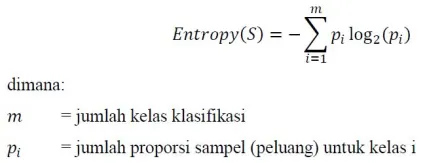

max_depth = 1
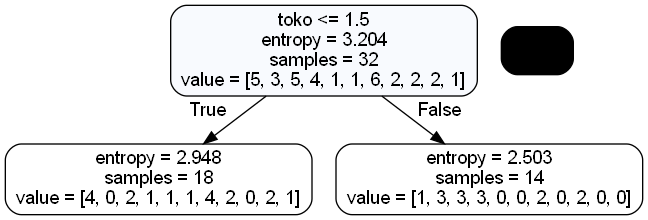

max_depth = 2
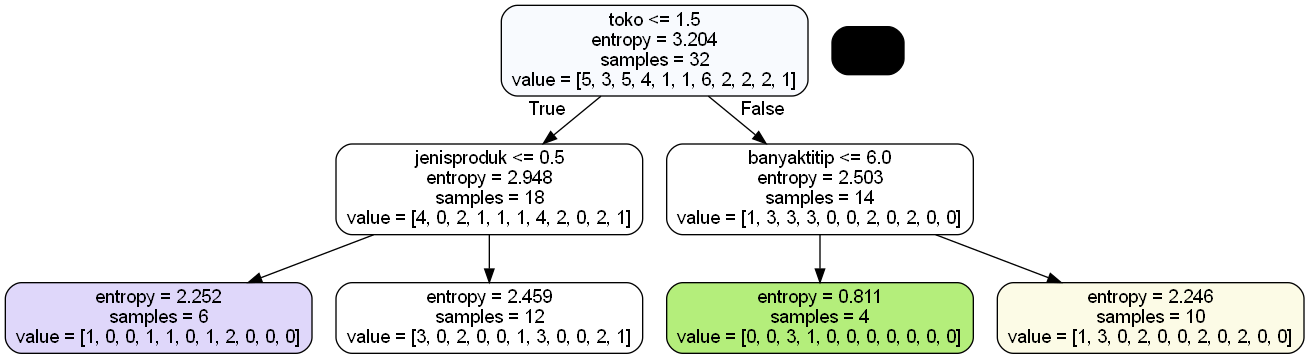

max_depth = 3
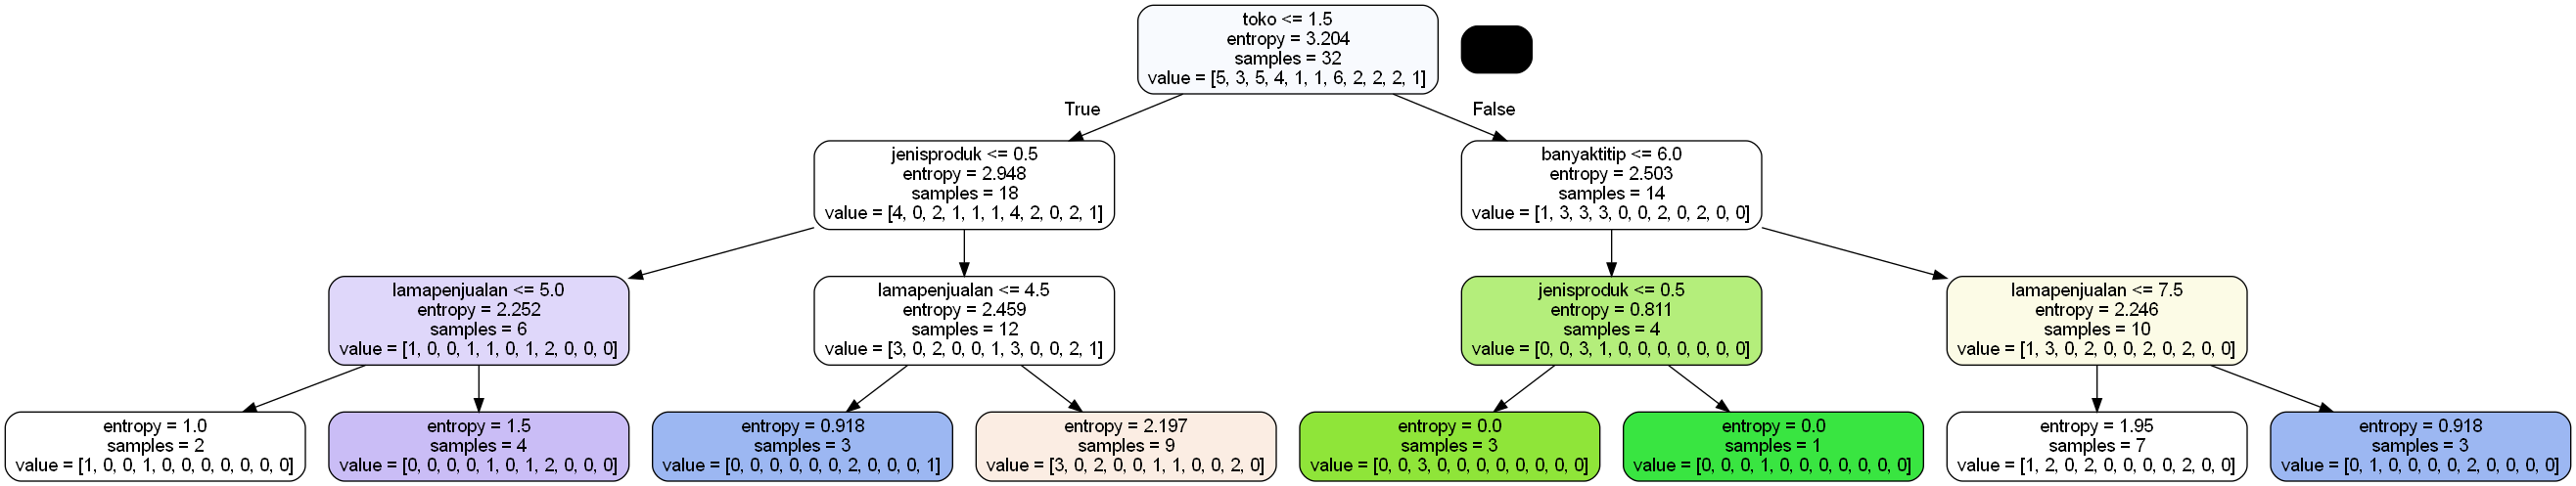